In [27]:
import os
import keras
import numpy as np
import pandas as pd
import helper_function
import matplotlib.pyplot as plt

In [2]:
# from keras.wrappers.scikit_learn import KerasClassifier
# from keras.utils import np_utils
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import KFold

## Step 1: Data Preprocessing

In [29]:
# Run this code if you need to clean and augment the data
data_processor = helper_function.data_processing()
dataset = data_processor.load_data() 
cleaned_dataset = data_processor.preprocessing(dataset)
augmented_dataset = data_processor.augment_save(cleaned_dataset) 
# export_csv = augmented_dataset.to_csv ("cleaned_augmented_data.csv", index = True, header=True)


# ## Run this code if you need to save the cleaned and original data
# states = ['fw_clean.csv', 'cw_clean.csv', 'oc_clean.csv', 'pe_clean.csv']
# for i in range(len(cleaned_dataset)):
#     clean_data = cleaned_dataset[i]
#     # Save the cleaned data
#     export_csv = clean_data.to_csv (states[i], index = True, header=True)

In [33]:
cleaned_dataset[0]

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.039326,0.394546,0.409402,0.351845,0.420885,0.563941,0.614782,0.535529,0.488066,0.488956,0.622206,0.564322,0.558791,0.486849,0.634305
1,0.036779,0.438724,0.418747,0.363013,0.415712,0.566265,0.611670,0.521770,0.484384,0.507496,0.639967,0.562287,0.561557,0.508049,0.631369
2,0.040571,0.479242,0.422629,0.373950,0.435482,0.561222,0.608771,0.512395,0.484983,0.524696,0.650727,0.569639,0.563530,0.527897,0.624310
3,0.038283,0.496442,0.418377,0.382421,0.458953,0.551827,0.611314,0.510328,0.487674,0.536979,0.655440,0.575063,0.565827,0.540198,0.618466
4,0.036939,0.492128,0.414415,0.382350,0.472941,0.543397,0.618694,0.514100,0.492290,0.530963,0.655244,0.567758,0.564645,0.546545,0.615834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65526,0.799064,0.618833,0.401570,0.330094,0.492039,0.549652,0.757984,0.477895,0.447763,0.552836,0.582072,0.520940,0.621364,0.531132,0.608913
65527,0.815960,0.588998,0.396941,0.326779,0.492541,0.543088,0.741053,0.456154,0.464268,0.570340,0.551894,0.526051,0.630742,0.524730,0.607009
65528,0.799829,0.542437,0.400740,0.329594,0.468639,0.537588,0.724791,0.450724,0.483579,0.585115,0.522666,0.535451,0.627273,0.521446,0.604874
65529,0.821630,0.497181,0.414988,0.335632,0.439908,0.534898,0.725759,0.454540,0.498602,0.599660,0.516329,0.551335,0.611133,0.524864,0.604196


## Step 2: Load the Cleaned Data 

In [3]:
# ## Load the cleaned data
# dataset = pd.read_csv("cleaned_augmented_data.csv", index_col=0)

# ## Initialize the class function
# feature_extract = helper_function.feature_extraction()

## Step 3: Feature Extraction 

In [4]:
# ## Time domain feature extraction
# time_features = feature_extract.time_domain(dataset)

# ## FFT feature extraction
# fft_data = feature_extract.fast_fourier_transform(dataset)
# fft_features = feature_extract.energy_dist(fft_data)

# ## DCT feature extraction
# dct_data = feature_extract.discrete_cosine_transform(dataset)
# dct_features = feature_extract.energy_dist(dct_data)

# ## MWT feature extraction
# mwt_features = feature_extract.morlet_wavelet_transform(dataset)

# ## Save the cleaned and augmented feature data
# features_pack = {file:data for file,data in 
#                  zip(['time_feature.csv','fft_feature.csv','dct_feature.csv','mwt_feature.csv'],
#                      [time_features, fft_features, dct_features, mwt_features])}

# for file_name in features_pack:
#     file = feature_extract.feature_data_save(features_pack[file_name])
#     export_csv = file.to_csv (file_name, index = True, header=True)

## Step 4: Classification 

In [2]:
## Load feature data
files = ['time_feature','fft_feature','dct_feature','mwt_feature']
dataset = [None]*len(files)
path = os.getcwd()+'/features_files/peneration/'

for i in range(len(files)):
    data = pd.read_csv(path+files[i]+'.csv', index_col=0)
    dataset[i] = data
dataset = {name:data for name,data in zip(files,dataset)}
dataset['fft_feature']

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,class,combo
1011,0.252313,0.164219,0.105858,0.140579,0.062784,0.061097,0.056354,0.039839,0.030838,0.027526,0.022508,0.017129,0.011811,0.006983,1,1
1012,0.241576,0.153070,0.086855,0.166372,0.069855,0.060591,0.056431,0.043740,0.034287,0.026592,0.024738,0.017148,0.011228,0.007231,1,1
1013,0.251410,0.133176,0.096997,0.155969,0.069424,0.064857,0.055989,0.040178,0.033815,0.031214,0.028701,0.018272,0.011562,0.008214,1,1
1014,0.217608,0.175489,0.096809,0.157372,0.065652,0.061248,0.063106,0.042254,0.035409,0.025043,0.023002,0.016546,0.012686,0.007528,1,1
1015,0.234249,0.153439,0.097816,0.152450,0.072905,0.057822,0.059386,0.044347,0.035477,0.028726,0.025857,0.015888,0.013075,0.008272,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4154,0.044213,0.121859,0.296893,0.126379,0.084246,0.123101,0.078802,0.035788,0.024655,0.017818,0.019731,0.018507,0.004435,0.003375,4,15
4155,0.048727,0.114272,0.316183,0.115304,0.076656,0.111922,0.084681,0.034327,0.025405,0.017908,0.026565,0.022270,0.003275,0.002314,4,15
4156,0.040700,0.115426,0.304084,0.138541,0.072132,0.130518,0.076536,0.031729,0.023394,0.020744,0.020226,0.018600,0.004134,0.003036,4,15
4157,0.042053,0.124506,0.335482,0.126887,0.080827,0.106150,0.066960,0.033360,0.021897,0.017661,0.018707,0.018878,0.003868,0.002669,4,15


In [3]:
nn_model = helper_function.classification()

data = dataset['fft_feature']
data = data.values
X, Y = nn_model.create_dataset(data)

nn_results = nn_model.mlp_model(X,Y)
svm_acc, svm_cm = nn_model.svm_ml(X,Y)


# files = ['time_feature','fft_feature','dct_feature','mwt_feature']
# comb_num = 15

# df = pd.DataFrame()
# # Feature loop
# for feature in files:
#     feature_data = dataset[feature]
#     combo_results = [None]*(comb_num+1)
#     # Combination loop
#     for i in range(1,comb_num+1): 
#         data = feature_data[feature_data['combo']==i]
#         data = data.values
#         X, Y = nn_model.create_dataset(data)
#         model_results = [nn_model.mlp_model(X,Y) for _ in range(3)]
#         combo_results[i] = np.mean(model_results)   
#     results = pd.DataFrame(combo_results)
#     results.columns = [feature]
#     df = pd.concat([df, results], axis=1)

In [4]:
nn_results

[96.66666388511658, 99.16666746139526, 98.33333492279053]

In [5]:
svm_acc

99.16666666666667

In [25]:
# from sklearn.utils.multiclass import unique_labels
# def plot_confusion_matrix(y_true, y_pred, classes,
#                           normalize=False,
#                           title=None,
#                           cmap=plt.cm.Blues):
#     """
#     This function prints and plots the confusion matrix.
#     Normalization can be applied by setting `normalize=True`.
#     """
#     if not title:
#         if normalize:
#             title = 'Normalized confusion matrix'
#         else:
#             title = 'Confusion matrix, without normalization'

#     # Compute confusion matrix
#     cm = confusion_matrix(y_true, y_pred)
#     # Only use the labels that appear in the data
# #     classes = classes[unique_labels(y_true, y_pred)]
#     classes = [1,2,3,4]
#     if normalize:
#         cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#         print("Normalized confusion matrix")
#     else:
#         print('Confusion matrix, without normalization')

#     print(cm)

#     fig, ax = plt.subplots(figsize=(8,8))
#     im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
#     ax.figure.colorbar(im, ax=ax)
#     # We want to show all ticks...
#     ax.set(xticks=np.arange(cm.shape[1]),
#            yticks=np.arange(cm.shape[0]),
#            # ... and label them with the respective list entries
#            xticklabels=classes, yticklabels=classes,
#            title=title,
#            ylabel='True label',
#            xlabel='Predicted label')

#     # Rotate the tick labels and set their alignment.
#     plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
#              rotation_mode="anchor")

#     # Loop over data dimensions and create text annotations.
#     fmt = '.2f' if normalize else 'd'
#     thresh = cm.max() / 2.
#     for i in range(cm.shape[0]):
#         for j in range(cm.shape[1]):
#             ax.text(j, i, format(cm[i, j], fmt),
#                     ha="center", va="center",
#                     color="white" if cm[i, j] > thresh else "black")
#     fig.tight_layout()
#     return ax

In [8]:
# importing necessary libraries 
from sklearn import datasets 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
  
# dividing X, y into train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, Y) 
  
# training a linear SVM classifier 
from sklearn.svm import SVC 
svm_model_linear = SVC(kernel = 'poly', gamma='scale').fit(X_train, y_train) 
svm_predictions = svm_model_linear.predict(X_test) 
  
# model accuracy for X_test   
acc = accuracy_score(y_test, svm_predictions)*100
  
# creating a confusion matrix 
cm = confusion_matrix(y_test, svm_predictions) 

In [9]:
print("Accuracy: {}%".format(round(acc,2)))

Accuracy: 98.33%


Normalized confusion matrix
[[1.         0.         0.         0.        ]
 [0.         1.         0.         0.        ]
 [0.06451613 0.         0.93548387 0.        ]
 [0.         0.         0.         1.        ]]


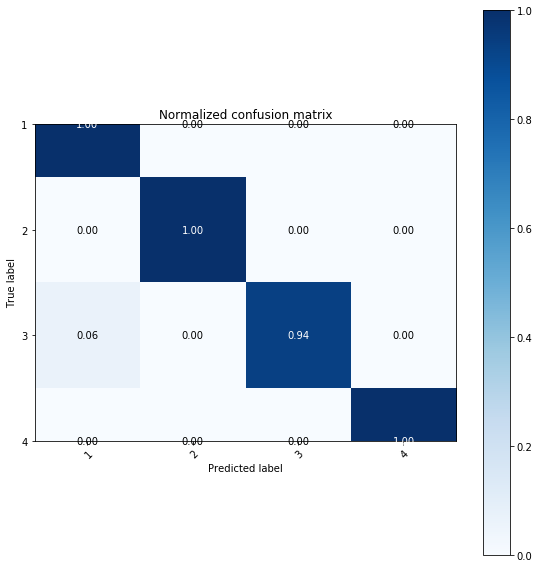

In [26]:
plot_confusion_matrix(y_test, svm_predictions, classes=[1,2,3,4], normalize=True, 
                      title='Normalized confusion matrix')
plt.show()


In [12]:
set(Y)

{1, 2, 3, 4}